# YouTube Trending Videos Analysis & Recommendation System

This notebook provides a comprehensive analysis of YouTube trending videos data from multiple countries and builds an intelligent video recommendation system.

## Contents
1. Data Loading & Merging
2. Data Cleaning & Preprocessing
3. Exploratory Data Analysis
4. Advanced Visualizations
5. Recommendation System
6. Interactive Frontend

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning and NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Interactive widgets
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Merge CSV Files

In [2]:
# Load all CSV files
print("Loading YouTube data from multiple countries...\n")

ca_data = pd.read_csv('data/CAvideos.csv')
gb_data = pd.read_csv('data/GBvideos.csv')
in_data = pd.read_csv('data/INvideos.csv')
us_data = pd.read_csv('data/USvideos.csv')

# Add country identifier
ca_data['country'] = 'CA'
gb_data['country'] = 'GB'
in_data['country'] = 'IN'
us_data['country'] = 'US'

print(f"CA Videos: {len(ca_data):,} rows")
print(f"GB Videos: {len(gb_data):,} rows")
print(f"IN Videos: {len(in_data):,} rows")
print(f"US Videos: {len(us_data):,} rows")

# Merge all datasets
df = pd.concat([ca_data, gb_data, in_data, us_data], ignore_index=True)

print(f"\n✓ Total merged dataset: {len(df):,} rows")
print(f"✓ Columns: {len(df.columns)}")

# Save merged data
df.to_csv('data/merged_youtube_data.csv', index=False)
print("\n✓ Merged data saved to 'data/merged_youtube_data.csv'")

Loading YouTube data from multiple countries...

CA Videos: 40,881 rows
GB Videos: 38,916 rows
IN Videos: 37,352 rows
US Videos: 40,949 rows

✓ Total merged dataset: 158,098 rows
✓ Columns: 17

✓ Merged data saved to 'data/merged_youtube_data.csv'


In [3]:
# Display first few rows
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/Interscope""|""Rap""",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé is available everywhere: http://shady.sr/WOWEminem ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""idubbbztv""|""idubbbztv2""|""things""|""best""|""packages""|""...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,"STill got a lot of packages. Probably will last for another year. On a side note, more 2nd chann...",CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5Fs...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best epis...",CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cover""|""official""|""remix""|""official video""|""lyrics""|""s...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlanti.cr/yt-album\nSubscribe to Ed's channel: http://b...,CA


In [4]:
# Dataset info
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158098 entries, 0 to 158097
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                158098 non-null  object
 1   trending_date           158098 non-null  object
 2   title                   158098 non-null  object
 3   channel_title           158098 non-null  object
 4   category_id             158098 non-null  int64 
 5   publish_time            158098 non-null  object
 6   tags                    158098 non-null  object
 7   views                   158098 non-null  int64 
 8   likes                   158098 non-null  int64 
 9   dislikes                158098 non-null  int64 
 10  comment_count           158098 non-null  int64 
 11  thumbnail_link          158098 non-null  object
 12  comments_disabled       158098 non-null  bool  
 13  ratings_disabled        158098 non-null  bool  
 14  video_error_or_

## 3. Data Cleaning and Preprocessing

In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
             Missing Count  Percentage
description           3039    1.922225


In [6]:
# Handle missing values
df['tags'] = df['tags'].fillna('')
df['description'] = df['description'].fillna('')

# Remove duplicates based on video_id
original_len = len(df)
df = df.drop_duplicates(subset=['video_id'], keep='first')
print(f"Removed {original_len - len(df):,} duplicate videos")

# Clean tags (remove pipe separators)
df['tags'] = df['tags'].apply(lambda x: x.replace('|', ' ') if isinstance(x, str) else '')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour

# Create engagement metrics
df['engagement_score'] = (df['likes'] + df['comment_count'] * 2 - df['dislikes']) / (df['views'] + 1)
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)

print(f"\n✓ Data cleaned! Final dataset: {len(df):,} unique videos")

Removed 112,944 duplicate videos

✓ Data cleaned! Final dataset: 45,154 unique videos


## 4. Exploratory Data Analysis

In [7]:
# Statistical Summary
print("=" * 80)
print("YOUTUBE TRENDING VIDEOS - STATISTICAL SUMMARY")
print("=" * 80)
print(f"\n📊 Total Videos: {len(df):,}")
print(f"🎬 Unique Channels: {df['channel_title'].nunique():,}")
print(f"🌍 Countries: {df['country'].nunique()}")
print(f"📂 Categories: {df['category_id'].nunique()}")
print(f"\n📈 Total Views: {df['views'].sum():,.0f}")
print(f"👍 Total Likes: {df['likes'].sum():,.0f}")
print(f"💬 Total Comments: {df['comment_count'].sum():,.0f}")

print(f"\n📊 Average Statistics per Video:")
print(f"  Views: {df['views'].mean():,.0f}")
print(f"  Likes: {df['likes'].mean():,.0f}")
print(f"  Dislikes: {df['dislikes'].mean():,.0f}")
print(f"  Comments: {df['comment_count'].mean():,.0f}")
print(f"  Engagement Score: {df['engagement_score'].mean():.4f}")

print("\n" + "=" * 80)

YOUTUBE TRENDING VIDEOS - STATISTICAL SUMMARY

📊 Total Videos: 45,154
🎬 Unique Channels: 8,045
🌍 Countries: 4
📂 Categories: 17

📈 Total Views: 18,598,655,807
👍 Total Likes: 639,187,690
💬 Total Comments: 86,573,110

📊 Average Statistics per Video:
  Views: 411,894
  Likes: 14,156
  Dislikes: 621
  Comments: 1,917
  Engagement Score: 0.0392



In [8]:
# Top 10 most viewed videos
print("\n🔥 TOP 10 MOST VIEWED VIDEOS")
print("=" * 80)
top_videos = df.nlargest(10, 'views')[['title', 'channel_title', 'views', 'likes', 'country']]
for idx, row in top_videos.iterrows():
    print(f"\n{row['title'][:70]}...")
    print(f"  Channel: {row['channel_title']} | Country: {row['country']}")
    print(f"  Views: {row['views']:,} | Likes: {row['likes']:,}")


🔥 TOP 10 MOST VIEWED VIDEOS

Sebastián Yatra - Por Perro ft. Luis Figueroa, Lary Over...
  Channel: SebastianYatraVEVO | Country: GB
  Views: 47,669,287 | Likes: 396,337

BTS (방탄소년단) 'FAKE LOVE' Official MV...
  Channel: ibighit | Country: CA
  Views: 39,349,927 | Likes: 3,880,074

Rkm & Ken-Y ❌ Natti Natasha - Tonta [Official Video]...
  Channel: Pina Records | Country: GB
  Views: 39,118,664 | Likes: 383,030

TWICE What is Love? M/V...
  Channel: jypentertainment | Country: GB
  Views: 38,873,543 | Likes: 1,111,595

Marvel Studios' Avengers: Infinity War Official Trailer...
  Channel: Marvel Entertainment | Country: CA
  Views: 37,736,281 | Likes: 1,735,931

Ozuna x Romeo Santos - El Farsante Remix...
  Channel: Ozuna | Country: CA
  Views: 37,597,115 | Likes: 769,384

Tiger Zinda Hai | Official Trailer | Salman Khan | Katrina Kaif...
  Channel: YRF | Country: IN
  Views: 35,885,754 | Likes: 829,362

Ed Sheeran - Perfect (Official Music Video)...
  Channel: Ed Sheeran | Country: CA


In [9]:
# Country-wise distribution
country_stats = df.groupby('country').agg({
    'video_id': 'count',
    'views': 'sum',
    'likes': 'sum',
    'comment_count': 'sum'
}).round(0)

country_stats.columns = ['Videos', 'Total Views', 'Total Likes', 'Total Comments']
print("\n🌍 COUNTRY-WISE STATISTICS")
print("=" * 80)
print(country_stats)


🌍 COUNTRY-WISE STATISTICS
         Videos  Total Views  Total Likes  Total Comments
country                                                  
CA        24427  11872789720    449417025        63402056
GB         2312   1694886020     65748883         7984093
IN        14856   3942369164     86952557        10787892
US         3559   1088610903     37069225         4399069


## 5. Data Visualizations

Let's create comprehensive and informative visualizations to understand the data better.

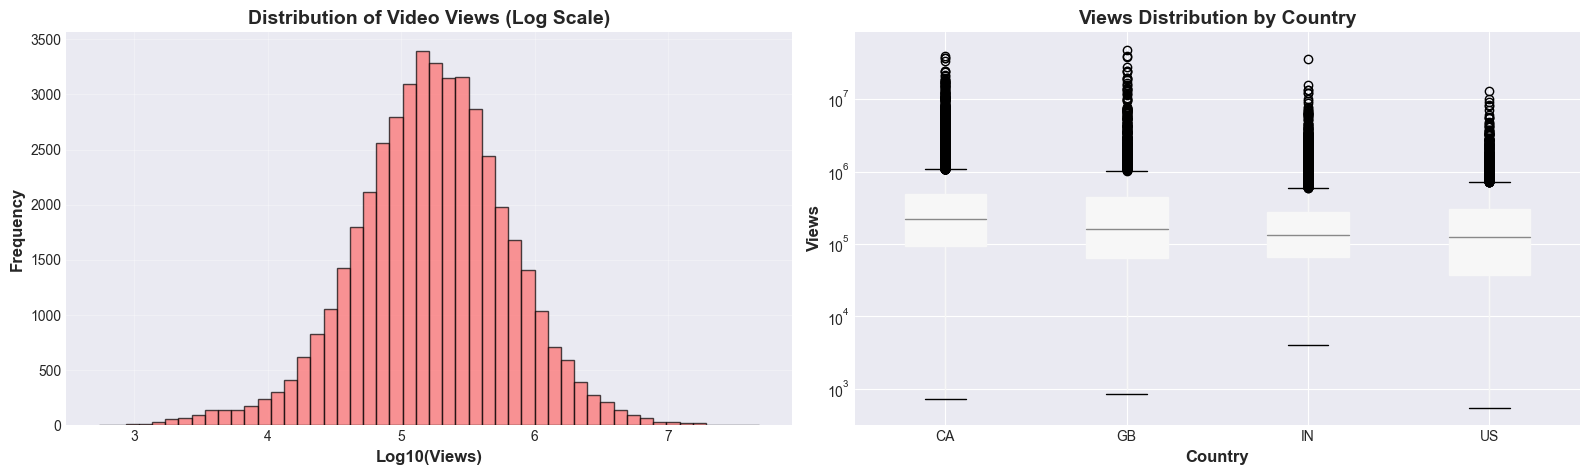

In [10]:
# 1. Views Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(np.log10(df['views'] + 1), bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Log10(Views)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Video Views (Log Scale)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot by country
df.boxplot(column='views', by='country', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Views', fontsize=12, fontweight='bold')
axes[1].set_title('Views Distribution by Country', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
plt.suptitle('')

plt.tight_layout()
plt.show()

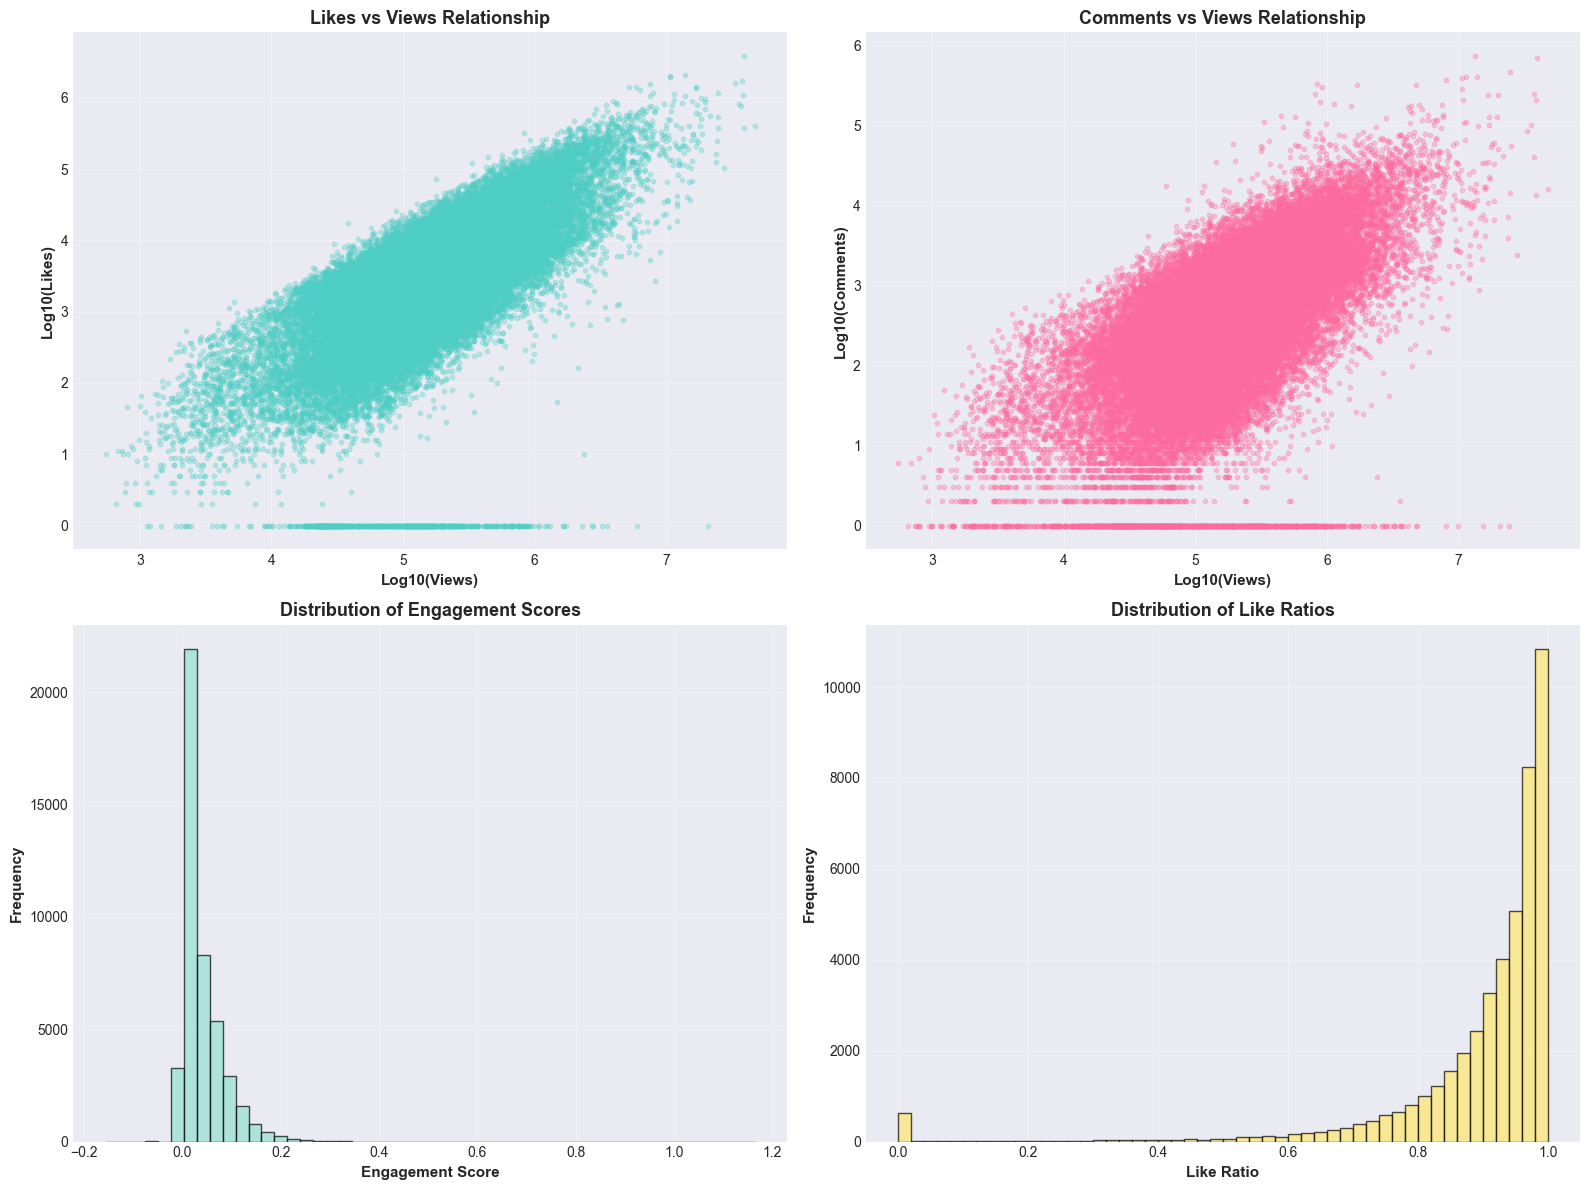

In [11]:
# 2. Engagement Metrics Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Likes vs Views
axes[0, 0].scatter(np.log10(df['views'] + 1), np.log10(df['likes'] + 1), 
                   alpha=0.3, c='#4ECDC4', s=10)
axes[0, 0].set_xlabel('Log10(Views)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Log10(Likes)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Likes vs Views Relationship', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Comments vs Views
axes[0, 1].scatter(np.log10(df['views'] + 1), np.log10(df['comment_count'] + 1), 
                   alpha=0.3, c='#FF6B9D', s=10)
axes[0, 1].set_xlabel('Log10(Views)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Log10(Comments)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Comments vs Views Relationship', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Engagement Score Distribution
axes[1, 0].hist(df['engagement_score'], bins=50, color='#95E1D3', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Engagement Score', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Engagement Scores', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Like Ratio Distribution
axes[1, 1].hist(df['like_ratio'], bins=50, color='#FFE66D', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Like Ratio', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of Like Ratios', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

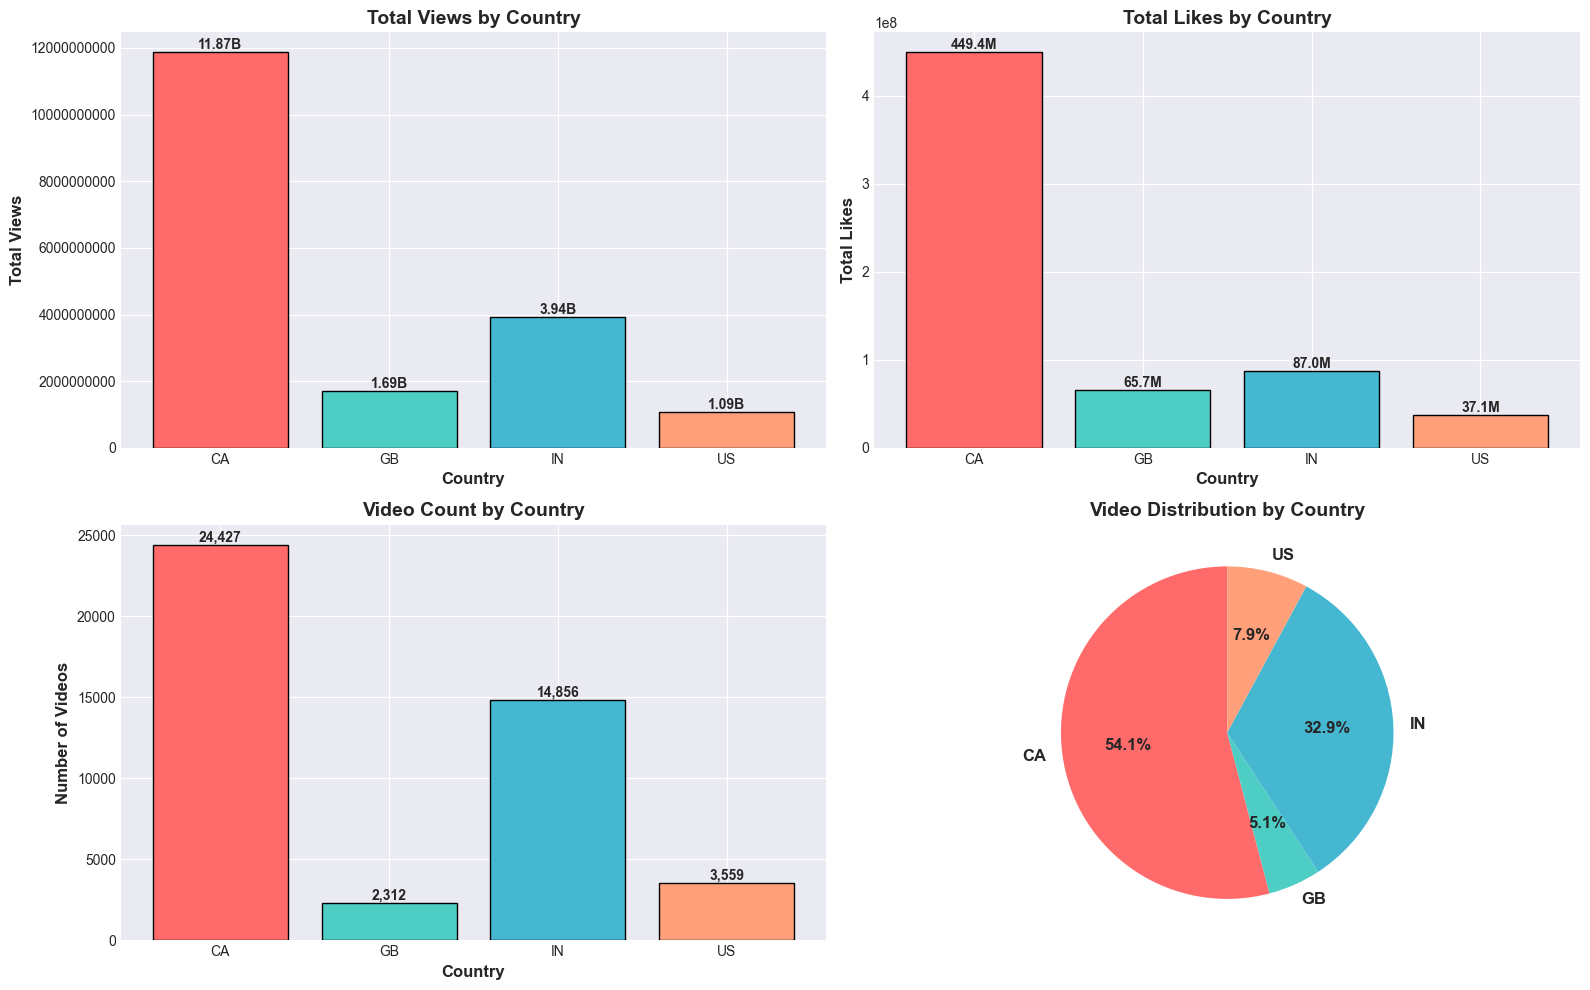

In [12]:
# 3. Country-wise Performance Analysis
country_data = df.groupby('country').agg({
    'views': 'sum',
    'likes': 'sum',
    'comment_count': 'sum',
    'video_id': 'count'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total Views by Country
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[0, 0].bar(country_data['country'], country_data['views'], color=colors, edgecolor='black')
axes[0, 0].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Views', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Total Views by Country', fontsize=14, fontweight='bold')
axes[0, 0].ticklabel_format(style='plain', axis='y')
for i, v in enumerate(country_data['views']):
    axes[0, 0].text(i, v, f'{v/1e9:.2f}B', ha='center', va='bottom', fontweight='bold')

# Total Likes by Country
axes[0, 1].bar(country_data['country'], country_data['likes'], color=colors, edgecolor='black')
axes[0, 1].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Likes', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Total Likes by Country', fontsize=14, fontweight='bold')
for i, v in enumerate(country_data['likes']):
    axes[0, 1].text(i, v, f'{v/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')

# Video Count by Country
axes[1, 0].bar(country_data['country'], country_data['video_id'], color=colors, edgecolor='black')
axes[1, 0].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Videos', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Video Count by Country', fontsize=14, fontweight='bold')
for i, v in enumerate(country_data['video_id']):
    axes[1, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart - Country Distribution
axes[1, 1].pie(country_data['video_id'], labels=country_data['country'], autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Video Distribution by Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

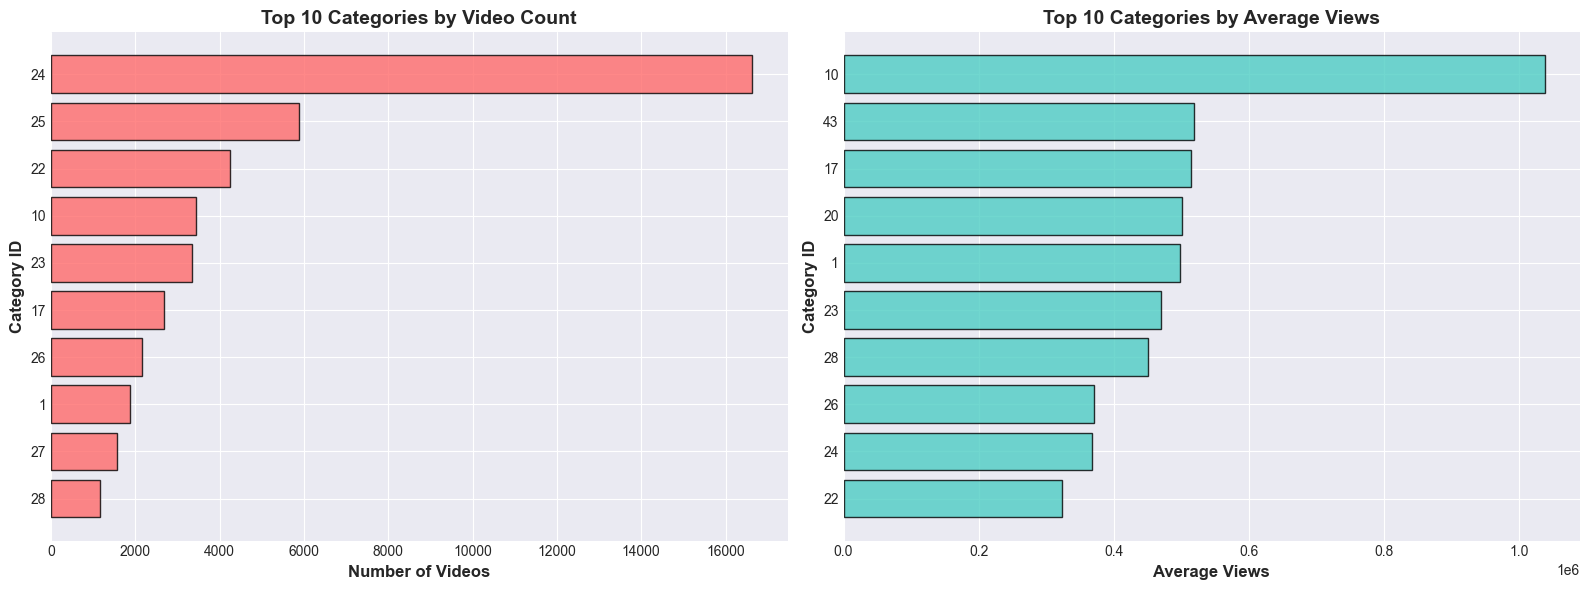

In [13]:
# 4. Top Categories Analysis
category_stats = df.groupby('category_id').agg({
    'video_id': 'count',
    'views': 'mean',
    'likes': 'mean'
}).sort_values('video_id', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top categories by video count
axes[0].barh(category_stats.index.astype(str), category_stats['video_id'], 
             color='#FF6B6B', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Number of Videos', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Category ID', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Categories by Video Count', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Average views by category
top_view_cats = df.groupby('category_id')['views'].mean().sort_values(ascending=False).head(10)
axes[1].barh(top_view_cats.index.astype(str), top_view_cats.values, 
             color='#4ECDC4', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Average Views', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Category ID', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Categories by Average Views', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

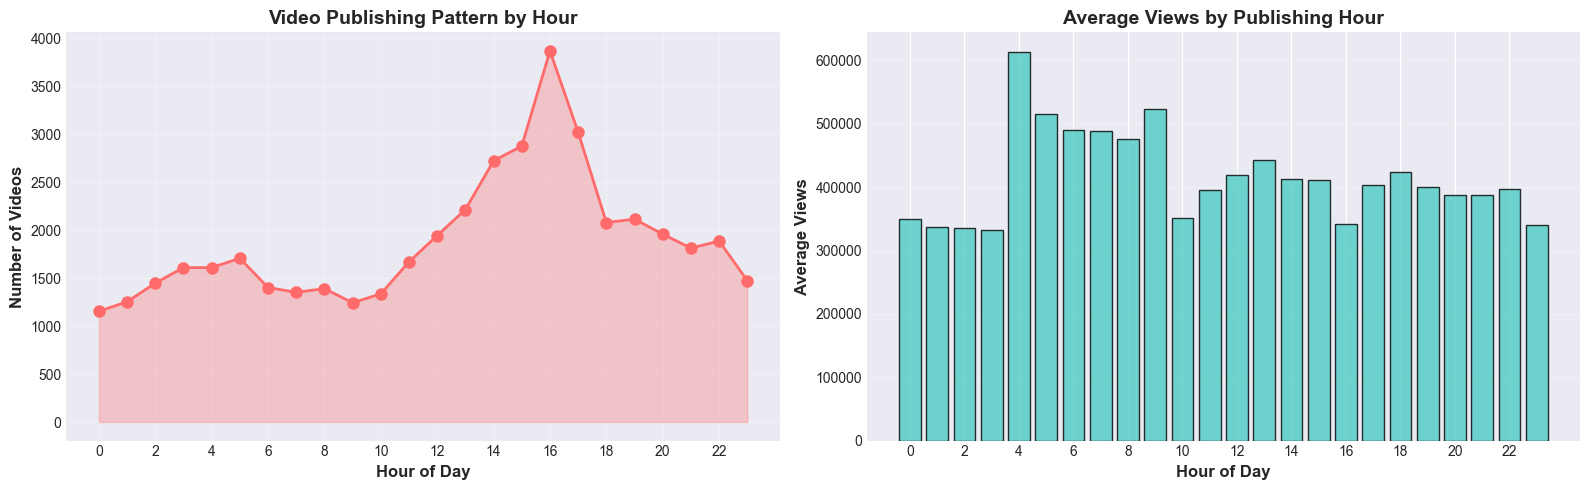

In [14]:
# 5. Publishing Time Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Videos by Hour of Day
hour_counts = df['publish_hour'].value_counts().sort_index()
axes[0].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, 
             markersize=8, color='#FF6B6B')
axes[0].fill_between(hour_counts.index, hour_counts.values, alpha=0.3, color='#FF6B6B')
axes[0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Videos', fontsize=12, fontweight='bold')
axes[0].set_title('Video Publishing Pattern by Hour', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Average views by hour
hour_views = df.groupby('publish_hour')['views'].mean()
axes[1].bar(hour_views.index, hour_views.values, color='#4ECDC4', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Views', fontsize=12, fontweight='bold')
axes[1].set_title('Average Views by Publishing Hour', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(0, 24, 2))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

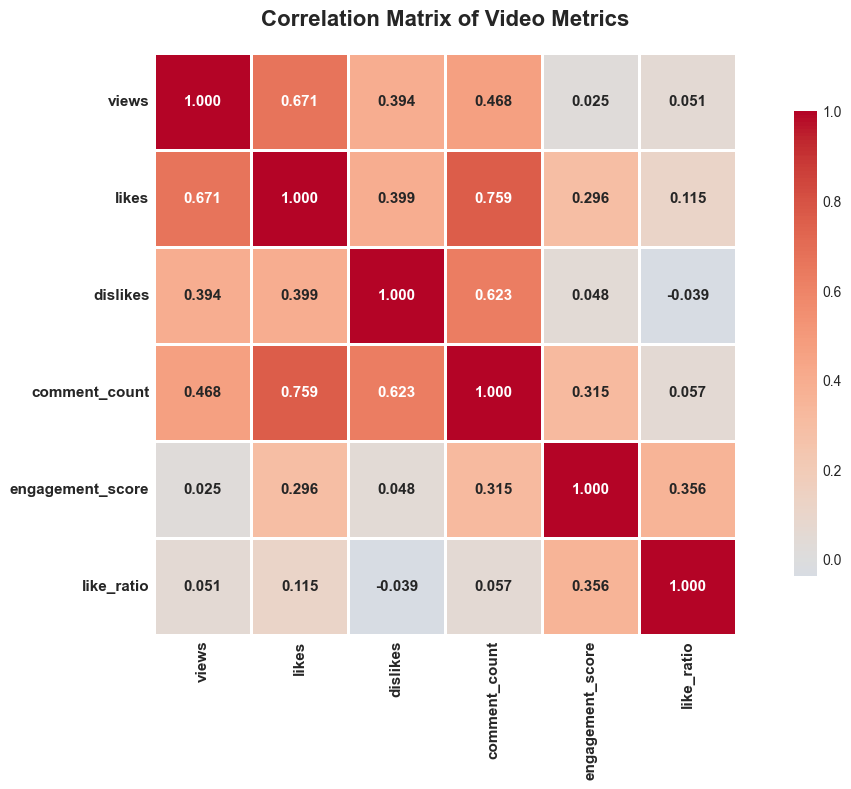

In [15]:
# 6. Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Select numeric columns for correlation
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count', 'engagement_score', 'like_ratio']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})

plt.title('Correlation Matrix of Video Metrics', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

Generating Word Cloud from Video Titles...


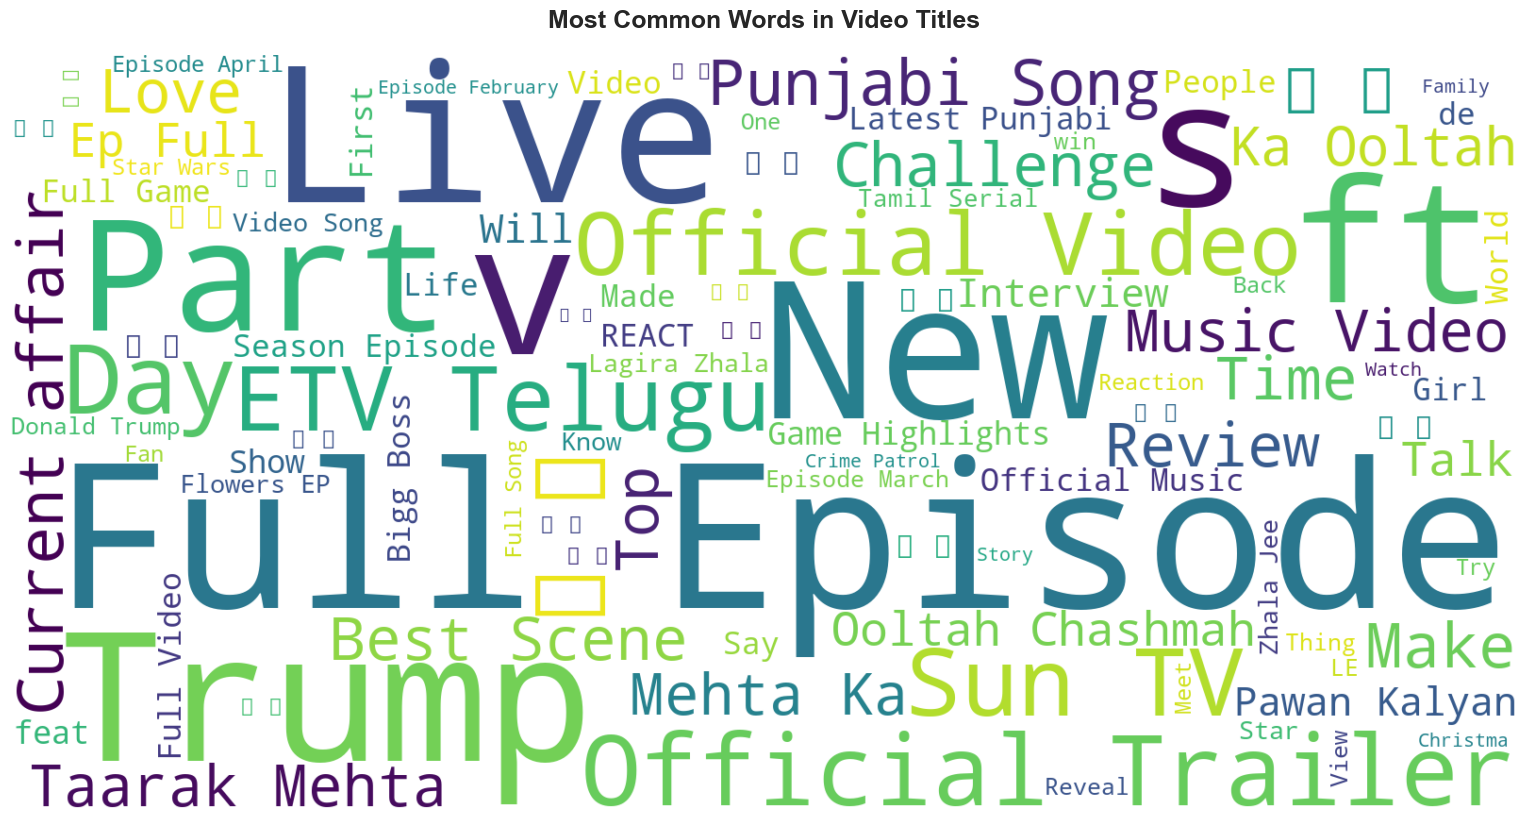

✓ Word cloud generated!


In [16]:
# 7. Word Cloud from Video Titles
print("Generating Word Cloud from Video Titles...")

# Combine all titles
all_titles = ' '.join(df['title'].astype(str).values)

# Create word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='viridis', max_words=100, 
                      relative_scaling=0.5, min_font_size=10).generate(all_titles)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Video Titles', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

print("✓ Word cloud generated!")

## 6. Build Video Recommendation System

Now let's build a content-based recommendation system using TF-IDF and cosine similarity.

In [17]:
# Prepare features for recommendation
print("Building recommendation system...")

# Combine text features
df['combined_features'] = (
    df['title'].fillna('') + ' ' + 
    df['tags'] + ' ' + 
    df['channel_title'].fillna('') + ' ' +
    df['description'].apply(lambda x: str(x)[:200] if pd.notna(x) else '')
)

# Calculate popularity score
df['popularity_score'] = (
    np.log1p(df['views']) * 0.4 +
    np.log1p(df['likes']) * 0.3 +
    np.log1p(df['comment_count']) * 0.3
)

print("✓ Features prepared!")
print(f"✓ Dataset size: {len(df):,} videos")

Building recommendation system...
✓ Features prepared!
✓ Dataset size: 45,154 videos


In [23]:
# Create TF-IDF Matrix
print("Creating TF-IDF matrix...")

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2
)

tfidf_matrix = tfidf.fit_transform(df['combined_features'])

print(f"✓ TF-IDF matrix created!")
print(f"  Shape: {tfidf_matrix.shape}")
print(f"  Features: {len(tfidf.get_feature_names_out())}")

Creating TF-IDF matrix...
✓ TF-IDF matrix created!
  Shape: (45154, 5000)
  Features: 5000


In [24]:
# Recommendation Function
def get_video_recommendations(video_id=None, title=None, n_recommendations=10):
    """
    Get video recommendations based on video_id or title
    """
    # Find video index
    if video_id:
        mask = df['video_id'] == video_id
        if not mask.any():
            print("❌ Video not found!")
            return None
        idx = df[mask].index[0]
    elif title:
        mask = df['title'].str.contains(title, case=False, na=False)
        if not mask.any():
            print("❌ Video not found!")
            return None
        idx = df[mask].index[0]
    else:
        print("❌ Please provide either video_id or title")
        return None
    
    # Get the position in the dataframe (not the index label)
    position = df.index.get_loc(idx)
    
    # Get the video details
    video = df.loc[idx]
    print("="*80)
    print(f"📹 SELECTED VIDEO")
    print("="*80)
    print(f"Title: {video['title']}")
    print(f"Channel: {video['channel_title']}")
    print(f"Views: {video['views']:,} | Likes: {video['likes']:,} | Comments: {video['comment_count']:,}")
    print(f"Country: {video['country']} | Category: {video['category_id']}")
    
    # Calculate cosine similarity using the position
    cosine_sim = cosine_similarity(tfidf_matrix[position:position+1], tfidf_matrix).flatten()
    
    # Get similar video indices (excluding the video itself)
    similar_positions = cosine_sim.argsort()[::-1][1:n_recommendations+1]
    
    # Get the actual indices from positions
    similar_indices = df.index[similar_positions]
    
    # Create recommendations dataframe
    recommendations = df.loc[similar_indices][['title', 'channel_title', 'views', 
                                                  'likes', 'comment_count', 'country', 
                                                  'category_id']].copy()
    recommendations['similarity_score'] = cosine_sim[similar_positions]
    
    print(f"\n{'='*80}")
    print(f"🎯 TOP {n_recommendations} RECOMMENDATIONS")
    print("="*80)
    
    for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
        print(f"\n{i}. {row['title'][:70]}...")
        print(f"   Channel: {row['channel_title']}")
        print(f"   Views: {row['views']:,} | Likes: {row['likes']:,} | Country: {row['country']}")
        print(f"   Similarity: {row['similarity_score']:.4f}")
    
    return recommendations

print("✓ Recommendation function ready!")

✓ Recommendation function ready!


## 7. Test the Recommendation System

In [25]:
# Test with a popular video
test_video_id = df.nlargest(1, 'views').iloc[0]['video_id']
recommendations = get_video_recommendations(video_id=test_video_id, n_recommendations=5)

📹 SELECTED VIDEO
Title: Sebastián Yatra - Por Perro ft. Luis Figueroa, Lary Over
Channel: SebastianYatraVEVO
Views: 47,669,287 | Likes: 396,337 | Comments: 15,955
Country: GB | Category: 10

🎯 TOP 5 RECOMMENDATIONS

1. Sebastián Yatra - No Hay Nadie Más...
   Channel: SebastianYatraVEVO
   Views: 24,843,733 | Likes: 372,300 | Country: GB
   Similarity: 0.9449

2. 2 Chainz - PROUD ft. YG, Offset...
   Channel: 2ChainzVEVO
   Views: 124,747 | Likes: 17,669 | Country: CA
   Similarity: 0.7724

3. CYN - Only With You...
   Channel: CYNVEVO
   Views: 28,983 | Likes: 1,532 | Country: US
   Similarity: 0.7247

4. J. Balvin - Ambiente...
   Channel: jbalvinVEVO
   Views: 7,828,494 | Likes: 310,322 | Country: CA
   Similarity: 0.7070

5. Sugarland - Still The Same...
   Channel: SugarlandVEVO
   Views: 477,816 | Likes: 6,136 | Country: GB
   Similarity: 0.6653


In [30]:
# Test with search by title
recommendations = get_video_recommendations(title='Music', n_recommendations=5)

📹 SELECTED VIDEO
Title: Ed Sheeran - Perfect (Official Music Video)
Channel: Ed Sheeran
Views: 33,523,622 | Likes: 1,634,130 | Comments: 85,067
Country: CA | Category: 10

🎯 TOP 5 RECOMMENDATIONS

1. Ed Sheeran - Happier (Official Video)...
   Channel: Ed Sheeran
   Views: 5,907,608 | Likes: 564,195 | Country: CA
   Similarity: 0.9318

2. Ed Sheeran - Perfect Symphony (with Andrea Bocelli)...
   Channel: Ed Sheeran
   Views: 5,988,303 | Likes: 532,894 | Country: CA
   Similarity: 0.9160

3. Ed Sheeran - Perfect Duet (with Beyoncé) [Official Audio]...
   Channel: Ed Sheeran
   Views: 8,130,538 | Likes: 643,781 | Country: CA
   Similarity: 0.9105

4. Ed Sheeran - Supermarket Flowers [Live from the BRITs 2018]...
   Channel: Ed Sheeran
   Views: 906,053 | Likes: 93,270 | Country: CA
   Similarity: 0.8866

5. Perfect - Ed Sheeran (Lyrics)...
   Channel: DopeLyrics
   Views: 315,296 | Likes: 3,197 | Country: CA
   Similarity: 0.8137


## 8. Interactive Frontend with Widgets

Let's create a simple and clean interactive interface for the recommendation system.

In [31]:
# Create interactive widgets
def display_recommendations(video_selection, num_recommendations):
    """Display recommendations in a clean format"""
    output_area.clear_output(wait=True)
    
    with output_area:
        # Get recommendations
        if video_selection:
            recommendations = get_video_recommendations(
                video_id=video_selection, 
                n_recommendations=num_recommendations
            )

# Prepare video selection options (top 100 popular videos)
popular_videos = df.nlargest(100, 'popularity_score')
video_options = {f"{row['title'][:60]}... ({row['channel_title']})": row['video_id'] 
                 for _, row in popular_videos.iterrows()}

# Create widgets
style = {'description_width': '150px'}

video_dropdown = widgets.Dropdown(
    options=video_options,
    description='Select Video:',
    style=style,
    layout=widgets.Layout(width='800px')
)

num_slider = widgets.IntSlider(
    value=5,
    min=3,
    max=15,
    step=1,
    description='Recommendations:',
    style=style,
    layout=widgets.Layout(width='400px')
)

recommend_button = widgets.Button(
    description='🎯 Get Recommendations',
    button_style='success',
    layout=widgets.Layout(width='250px', height='40px'),
    style={'font_weight': 'bold'}
)

output_area = widgets.Output()

def on_button_click(b):
    display_recommendations(video_dropdown.value, num_slider.value)

recommend_button.on_click(on_button_click)

# Display interface
print("="*80)
print("🎬 YOUTUBE VIDEO RECOMMENDATION SYSTEM")
print("="*80)
print("\nSelect a video from the dropdown and click the button to get recommendations!")
print("\n")

display(widgets.VBox([
    widgets.HTML('<h3 style="color: #FF0000;">YouTube Video Recommendation System</h3>'),
    widgets.HTML('<p style="color: #555;">Select a video and get personalized recommendations based on content similarity</p>'),
    video_dropdown,
    num_slider,
    recommend_button,
    output_area
], layout=widgets.Layout(padding='20px', border='2px solid #ddd', border_radius='10px')))

🎬 YOUTUBE VIDEO RECOMMENDATION SYSTEM

Select a video from the dropdown and click the button to get recommendations!




## Summary

This notebook has successfully:

1. ✅ **Merged** four YouTube trending video datasets (CA, GB, IN, US) into a single comprehensive dataset
2. ✅ **Cleaned and preprocessed** the data, handling missing values and creating derived metrics
3. ✅ **Analyzed** the data with comprehensive statistical summaries
4. ✅ **Visualized** the data with informative charts covering:
   - View distributions and engagement metrics
   - Country-wise performance comparisons
   - Category analysis
   - Publishing time patterns
   - Correlation matrices
   - Word clouds
5. ✅ **Built** a content-based recommendation system using TF-IDF and cosine similarity
6. ✅ **Created** an interactive frontend with widgets for easy video recommendations

The recommendation system can suggest similar videos based on title, tags, channel, and description content, helping users discover relevant content!